<a href="https://colab.research.google.com/github/abdelrhmanhesham1/projects/blob/main/gold_egypt_dataset(linear_regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

In [2]:
df = pd.read_csv('/content/gold_egypt_dataset.csv')

In [12]:
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)
print("Dataset Head:", df.head())
df["Date"] = pd.to_datetime(df["Date"])

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    48 non-null     datetime64[ns]
 1   GoldPrice_EGP_21        48 non-null     float64       
 2   ExchangeRate_EGP_USD    48 non-null     float64       
 3   GlobalGoldPrice_USD_oz  48 non-null     float64       
 4   InflationRate_Egypt     48 non-null     float64       
 5   FedInterestRate         48 non-null     float64       
 6   LocalDemandIndex        48 non-null     int64         
 7   GeoPoliticalRiskIndex   48 non-null     float64       
 8   GlobalOilPrice          48 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 3.5 KB
None

Missing Values:
Date                      0
GoldPrice_EGP_21          0
ExchangeRate_EGP_USD      0
GlobalGoldPrice_USD_oz    0
InflationRate_

In [38]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical columns: {len(numerical_cols)}")
print(numerical_cols)


Numerical columns: 8
['GoldPrice_EGP_21', 'ExchangeRate_EGP_USD', 'GlobalGoldPrice_USD_oz', 'InflationRate_Egypt', 'FedInterestRate', 'LocalDemandIndex', 'GeoPoliticalRiskIndex', 'GlobalOilPrice']


In [39]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# detect outliers for each column
print("\nOutlier Detection (IQR Method):")
outlier_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_summary[col] = {
        'count': outlier_count,
        'percentage': (outlier_count / len(df)) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    print(f"  {col}: {outlier_count} outliers ({outlier_summary[col]['percentage']:.2f}%)")



Outlier Detection (IQR Method):
  GoldPrice_EGP_21: 0 outliers (0.00%)
  ExchangeRate_EGP_USD: 0 outliers (0.00%)
  GlobalGoldPrice_USD_oz: 0 outliers (0.00%)
  InflationRate_Egypt: 0 outliers (0.00%)
  FedInterestRate: 0 outliers (0.00%)
  LocalDemandIndex: 0 outliers (0.00%)
  GeoPoliticalRiskIndex: 0 outliers (0.00%)
  GlobalOilPrice: 0 outliers (0.00%)


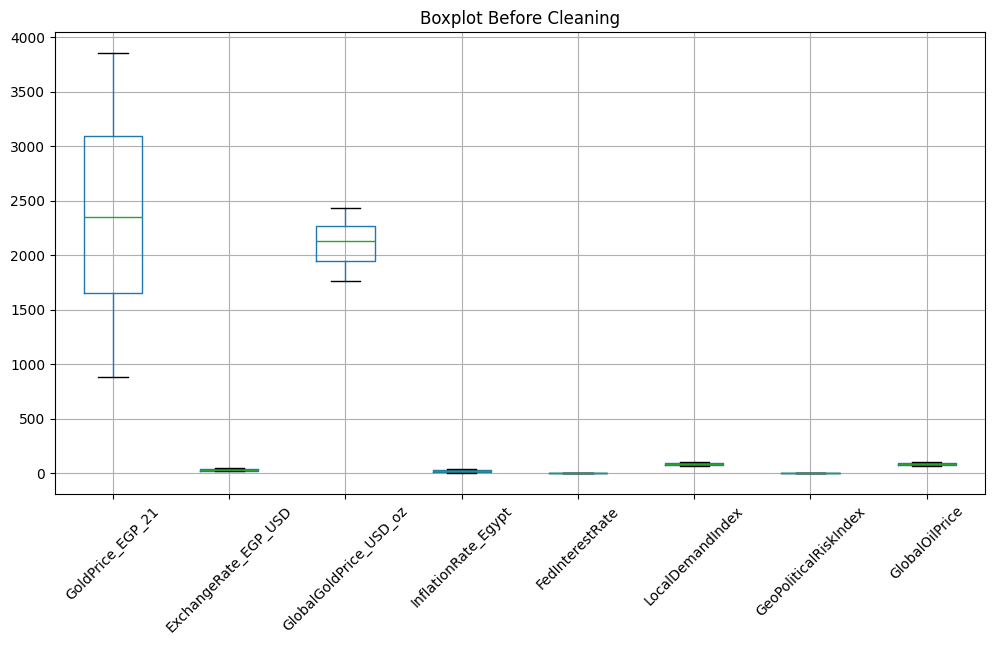

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
df[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot Before Cleaning")
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[numerical_cols])

scaled_df = pd.DataFrame(
    scaled_values,
    columns=numerical_cols
)

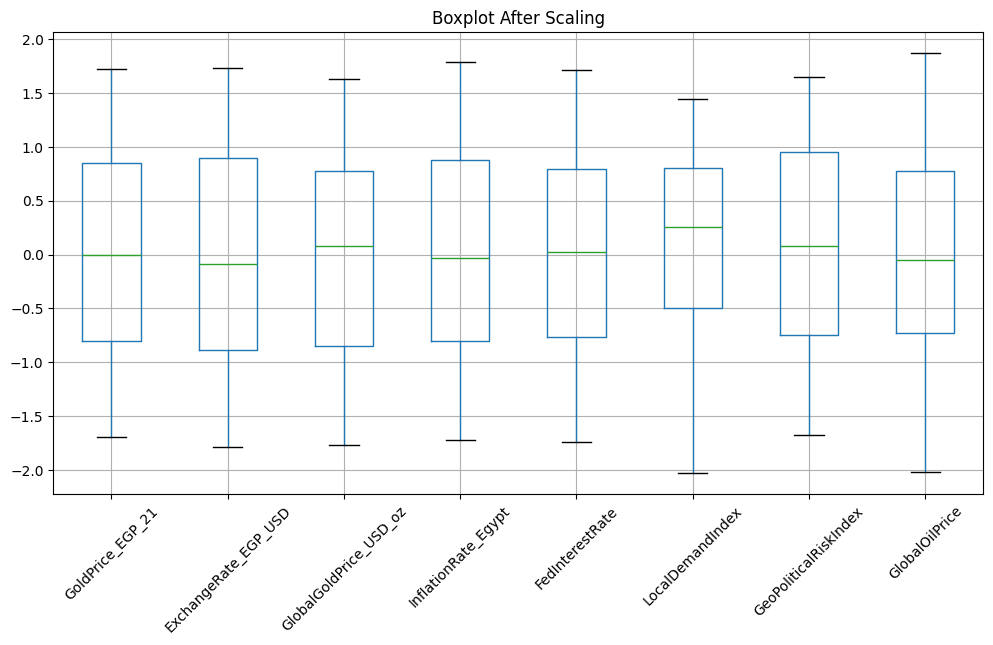

In [43]:
plt.figure(figsize=(12,6))
scaled_df.boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot After Scaling")
plt.show()

Correlation Analysis


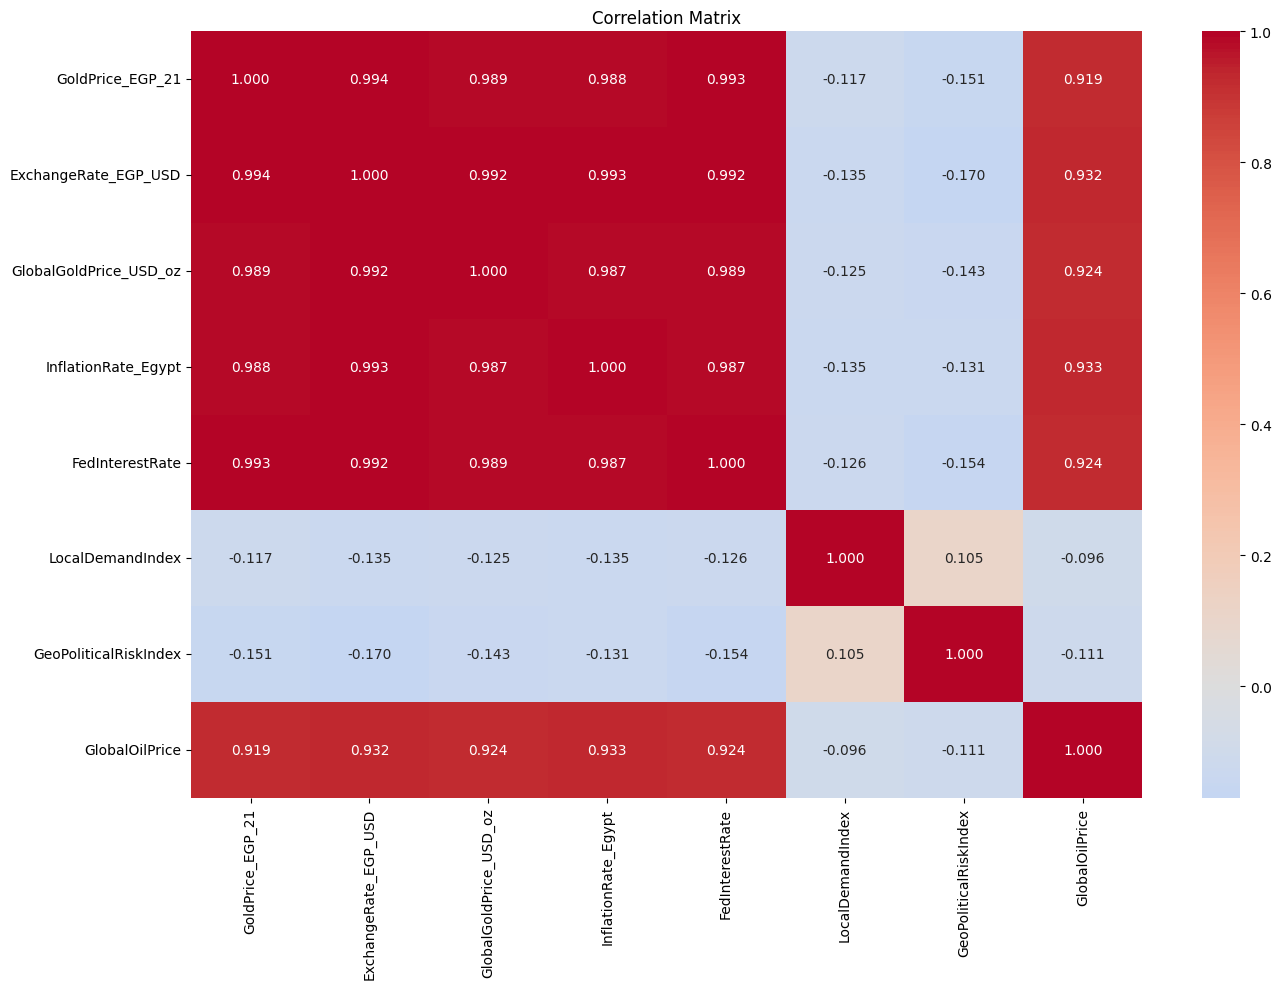


Correlation with GoldPrice_EGP_21:
GoldPrice_EGP_21          1.000000
ExchangeRate_EGP_USD      0.993971
FedInterestRate           0.993203
GlobalGoldPrice_USD_oz    0.989444
InflationRate_Egypt       0.988276
GlobalOilPrice            0.918846
LocalDemandIndex         -0.117118
GeoPoliticalRiskIndex    -0.150551
Name: GoldPrice_EGP_21, dtype: float64


In [44]:
print("Correlation Analysis")

corr = df[numerical_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

print("\nCorrelation with GoldPrice_EGP_21:")
print(corr["GoldPrice_EGP_21"].sort_values(ascending=False))


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

target = "GoldPrice_EGP_21"

X = df[numerical_cols].drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"train R²: {train_r2:.3f}")
print(f"test R²: {test_r2:.3f}")
print(f"RMSE: {rmse:.3f}")


train R²: 0.993
test R²: 0.980
RMSE: 104.859


In [59]:
model.coef_

array([649.31912476, -36.53950834, -30.06438176, 361.45458498,
         6.92497281,  27.62340301, -44.82276817])